In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gene_expression_ml.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


GENE EXP LEVEL: ratio between the expression of the target gene (gene of interest) and expression of one or more reference genes (often household genes)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


<Axes: xlabel='Gene One', ylabel='Gene Two'>

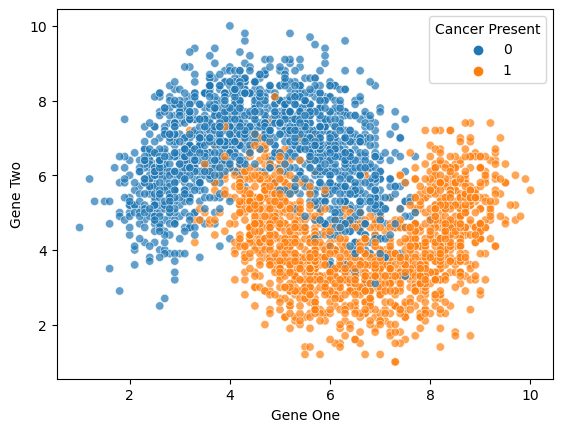

In [7]:
sns.scatterplot(data = df, x='Gene One', y='Gene Two', hue = 'Cancer Present', alpha=0.7)

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('Cancer Present', axis =1)
y = df['Cancer Present']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=50)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=6)

In [54]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [55]:
y_pred = knn_model.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [57]:
confusion_matrix(y_test,y_pred)

array([[421,  31],
       [ 31, 417]])

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       452
           1       0.93      0.93      0.93       448

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



## Elbow Method to find optimum K

In [23]:
test_error_rates = []

for k in range(1,30):  #not including 30
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

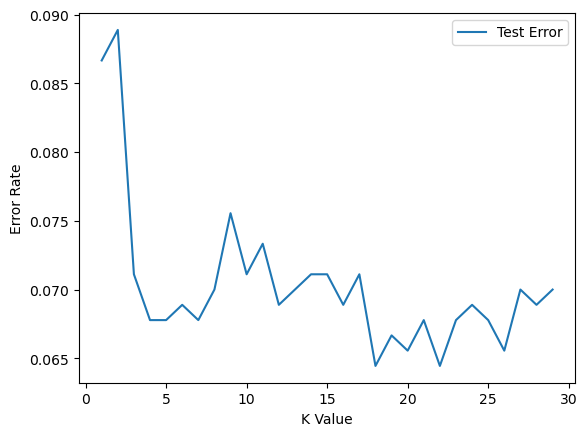

In [25]:
plt.plot(range(1,30),test_error_rates, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

## Full cross validation Grid Search for K Value

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [35]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [36]:
operations = [('scaler',scaler),('knn',knn)]

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
pipe = Pipeline(operations)

In [39]:
from sklearn.model_selection import GridSearchCV
k_values = list(range(1,20))

In [40]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [41]:
param_grid = {'knn__n_neighbors':k_values}

* chosen_string_name+two underscores + parameter key name

In [42]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5)

In [43]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]})

In [45]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [48]:
len(full_cv_classifier.cv_results_['mean_test_score'])

19

## Final Model

In [49]:
scaler = StandardScaler()
knn6 = KNeighborsClassifier(n_neighbors=6)
operations6 = [('scaler',scaler),('knn6',knn6)]
pipe6 = Pipeline(operations6)

In [50]:
pipe6.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn6', KNeighborsClassifier(n_neighbors=6))])

In [51]:
pipe6_pred = pipe6.predict(X_test)

In [52]:
print(classification_report(y_test,pipe6_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       452
           1       0.93      0.93      0.93       448

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [59]:
X_test.iloc[20]

Gene One    2.6
Gene Two    6.4
Name: 1916, dtype: float64

In [61]:
pipe6.predict_proba([[2.6,6.4]])

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])

In [63]:
pipe6.predict([[3,8]])

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])